## Name: Vishwas Sunil Kshirsagar


## Task 3: Exploratory Data Analysis - Retail

### Problem Statement: Perform 'Exploratory Data Analysis' on dataset 'Sample Superstore'

In [23]:
# Importing all the neccessary libraries

import pandas as pd  # to analyze data
import numpy as np  # to perform a wide variety of mathematical operations on arrays
import seaborn as sns # to visualize random distributions.
import matplotlib.pyplot as plt # to perform data visualization and graphical plotting
%matplotlib inline
import plotly.offline as plot_off # to generate graphs offline and save them in local machine
import plotly.graph_objects as plot_graph # provides an automatically-generated hierarchy of classes called "graph objects" that may be used to represent figures

In [2]:
# load and read the dataset

sample_sup = pd.read_csv("C:/The Spark Foundation/SampleSuperstore.csv")

In [3]:
# print first 5 records

sample_sup.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# print last 5 records

sample_sup.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
# print the shape of the dataset

sample_sup.shape

(9994, 13)

In [6]:
# print the null's if there are any

sample_sup.isnull().sum()  # as per the results there isn't null value.

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
# print the dataset info

sample_sup.info()   # printing the information of the data type, total number of records, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
# print the 5 point summary(mean, median, mode, min, max)

sample_sup.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [15]:
# Dropping the postal code as it doesn't contribute in the analysis

sample_sup.drop("Postal Code", axis = 1, inplace = True)


In [16]:
# check the records
sample_sup.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [19]:
cols = sample_sup.select_dtypes(include=["object", "float64", "int64"]).columns

In [20]:
# print the all columns of 'object', 'float', 'integer' data type

cols

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [21]:
for col in sample_sup[cols]:
    display(col)
    display(sample_sup[col].unique())  # to print and identify each unique component/variable of each attribute.

'Ship Mode'

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

'Segment'

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

'Country'

array(['United States'], dtype=object)

'City'

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

'State'

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

'Region'

array(['South', 'West', 'Central', 'East'], dtype=object)

'Category'

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

'Sub-Category'

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

'Sales'

array([261.96 , 731.94 ,  14.62 , ..., 437.472,  97.98 , 243.16 ])

'Quantity'

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12],
      dtype=int64)

'Discount'

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

'Profit'

array([ 41.9136, 219.582 ,   6.8714, ...,  16.124 ,   4.1028,  72.948 ])

## Data Visualization

### Let's visualize the relationship between Sales & Profit

In [45]:
# Let's plot the graph to visualize the relation between Sales and Profit

data = [plot_graph.Scatter(x=sample_sup.Sales, y=sample_sup.Profit,mode="markers",
                          marker= dict(size=15, color='rgb(20,10,20)',
                          symbol="square", line = dict(width=2, )))]
layout = plot_graph.Layout(title = "Sales vs Profits",
                          xaxis = dict(title="Sales"),
                          yaxis = dict(title="Profit"))
fig = plot_graph.Figure(data=data, layout=layout)
fig.show()

### As per the nature of economic behaviour when the sales goes down, profit goes down too and viceversa. Similarly with the above graph we can suggest and infer that more sales heps to gain more profit. 

## Let's visualize the relation between 'Discount' and 'Profit'

In [52]:
# Let's plot the graph to analysis discount and profit trend

data = [plot_graph.Scatter(x= sample_sup.Discount, y=sample_sup.Profit, mode = "markers",
                         marker = dict(size=14, color= 'rgb(20,10,20)',
                                      line = dict(width=2)))]
layout = plot_graph.Layout(title = "discount vs Profit",
                          xaxis = dict(title="Discount"),
                           yaxis= dict(title="Profit"))
fig = plot_graph.Figure(data=data, layout = layout)
fig.show()

### Likewise, lending discount is always beneficial for companies growth but the discount should be around 15-20% in order to maintain the profit and loss sheet.

### With the above graph we can interpret discount is contributing in order to gain more profit but also indicating that the discount should be set accordingly.

# let's explore more

### Let's visualize Shipping mode

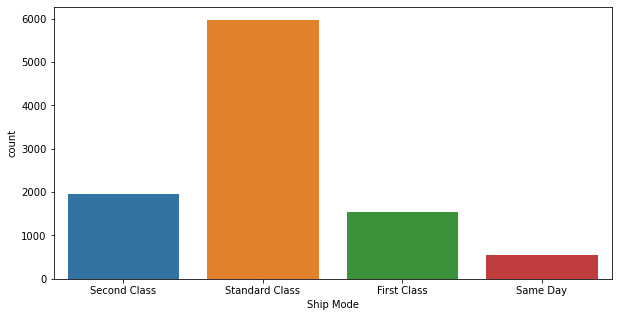

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x= "Ship Mode", data = sample_sup)
plt.show()

### Quicker the service better is the outcome. 

### which is exactly reflecting in the graph. However, Profit gain is more in case of standard delivery. Which suggests business should focuses more on standard Class.

# Let's explore the 'Statewise' trend.

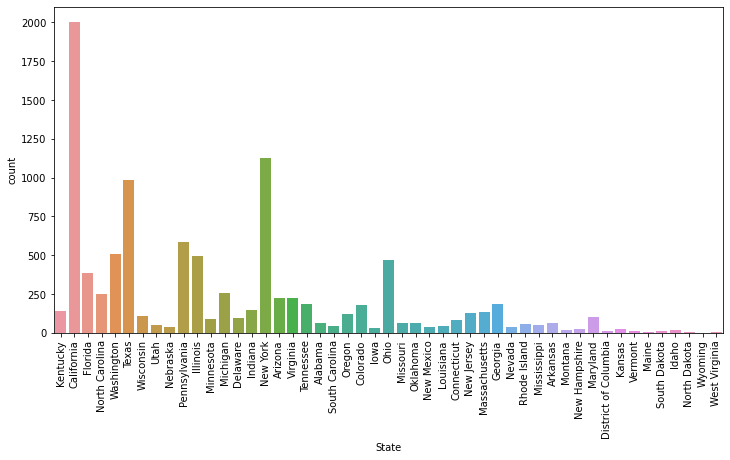

In [69]:
plt.figure(figsize=(12,6))
sns.countplot(x="State", data = sample_sup)
plt.xticks(rotation = (90))
plt.show()

### This graph helps us infer that the companies products are getting sold more in 'California', 'Texas', 'Pennsylvania', 'Illinois', 'New York', 'Ohio' states as compare to all other State.

### Which is helping the business to focus more in these states selling and gain more and more profit.

## Let's explore 'Segment' trend of sales

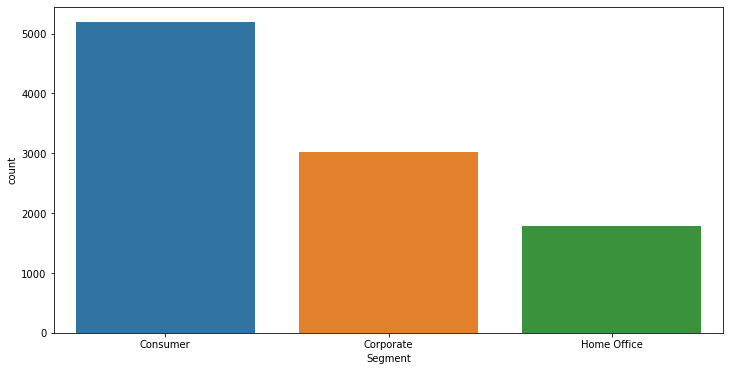

In [73]:
plt.figure(figsize=(12,6))
sns.countplot(x='Segment', data = sample_sup)
plt.show()

### Consumer has more interest in order to buy more products as compare to other two segment.

### Hence business should focus more on goods quality when it comes to sale it to the consumer segment.

### in order to maintain and increase the sale with consumer segment.

## Let's explore 'Region' wise trend

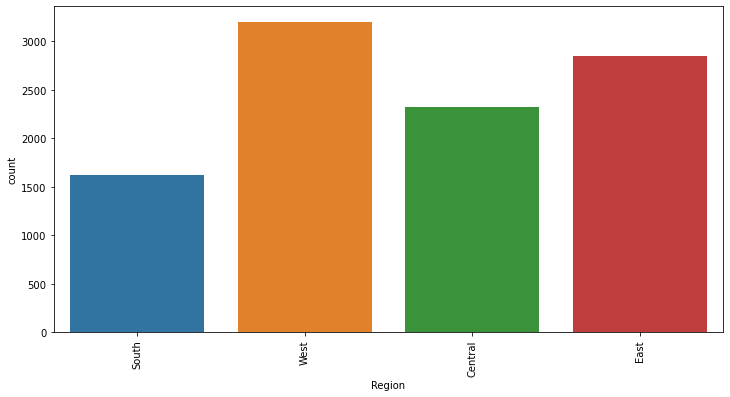

In [76]:
plt.figure(figsize=(12,6))
sns.countplot(x='Region', data=sample_sup)
plt.xticks(rotation=(90))
plt.show()

### 'West' and 'East' regions are inclining towards buying more products as compare to 'South' and 'Central'.

### Company should focuses more on it's quality in these regions and make stratergy to maintain the profit. 

## Let's explore 'Category' wise

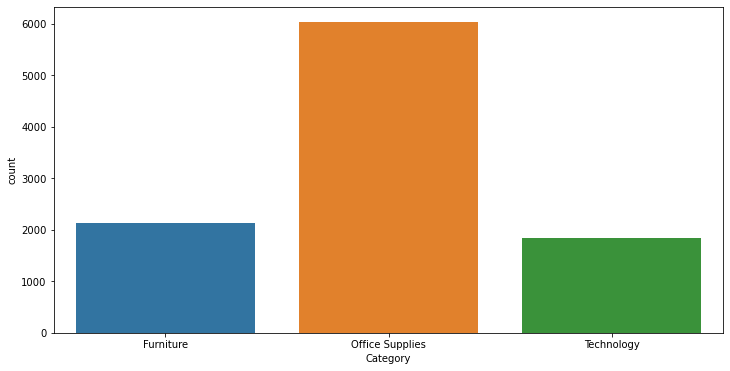

In [78]:
plt.figure(figsize=(12,6))
sns.countplot(x='Category', data=sample_sup)
plt.show()

### Developed states inclined towards technology hence as per the trend we can see that 'office supplies category' has more profit than other category.

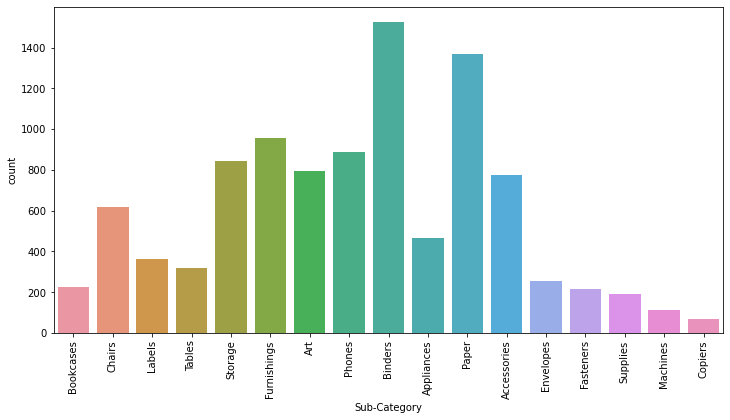

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sub-Category', data=sample_sup)
plt.xticks(rotation=(90))
plt.show()

### As can see in the graph 'office supply goods' having more sale as compare to other products.

### However, company should focuses on these products.

## Conclusion:

### Product Purchase is more in united States as compare to any other region, which defines company should focuses more into expanding their business in these states and focuses more on qualities of product, in order to gain more profit.